In [1]:
import numpy as np
from scipy import stats
def gen_sindata(n=2):
    x = stats.uniform(-1,2) # define random variable
    v = x.rvs((n,1)) # generate sample
    y = np.sin(np.pi*v) # use sample for sine
    return (v,y)

In [2]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=False)
X, y = gen_sindata(2)
lr.fit(X,y)
lr.coef_

array([[2.9764537]])

Text(0.5, 1.0, '$a=2.98$')

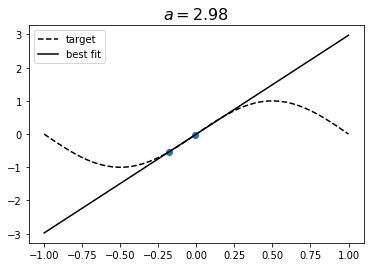

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
xi= np.linspace(-1,1,50)
yi= np.sin(np.pi*xi)
y_pred = lr.predict(xi.reshape(-1,1))

plt.plot(xi, yi,'--k',label='target')
plt.plot(X, y, 'o')
plt.plot(xi, y_pred, c='k', label='best fit')
plt.legend(loc='best')
plt.title('$a=%3.3g$'%(lr.coef_),fontsize=16)

In [4]:
cnt = 100000
#cnt = 1000
a_out=[] # output container
for i in range(cnt):
    X, y = gen_sindata(2)
    lr.fit(X,y)
    y_pred = lr.predict(xi.reshape(-1,1))
    a_out.append(lr.coef_[0,0])
a_bar = np.mean(a_out) # approx 1.43
a_var = np.var(a_out) # approx 0.71

In [5]:
print (a_bar, a_var)

1.430201939722205 0.7099840868207515


In [6]:
# confirm the variance
vsum = 0
for i in range(cnt):
    vsum += (a_out[i] - a_bar) ** 2
a_var2 = vsum / cnt
print (a_var2)

0.7099840868207482


Text(0.5, 1.0, '$a_{bar}=1.43$, $a_{var}=0.71$')

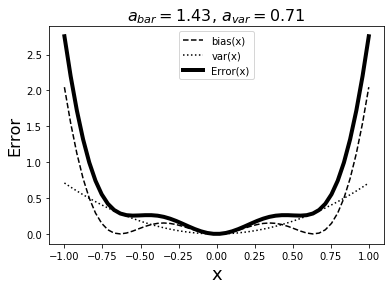

In [7]:
xi= np.linspace(-1,1,50)
yi= np.sin(np.pi*xi)

plt.plot(xi,(a_bar*xi-yi)**2,'--k',label='bias(x)')
plt.plot(xi,(a_var)*(xi)**2,':k',label='var(x)')
plt.plot(xi,((a_bar*xi-yi)**2 + a_var*(xi)**2),'-k',lw = 4, label='Error(x)')
plt.legend(loc='best')
plt.xlabel('x', fontsize=18)
plt.ylabel('Error',fontsize=16)
plt.title('$a_{bar}=%3.3g$, $a_{var}=%3.3g$'%(a_bar,a_var),fontsize=16)

In [10]:
# compute bias and variance
cnt = 1000000
bias = 0
var = 0
x = np.random.uniform(-1, 1, size = cnt)
for i in range(cnt):
    bias += (a_bar*x[i] - np.sin(np.pi*x[i]))**2
    var += a_var * x[i] * x[i]
bias = bias / cnt # approx 0.271
var = var / cnt # approx 0.237

In [11]:
print(bias, var)

0.27145142612894013 0.23671308882464215
